In [5]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
conn = psycopg2.connect( host = 'localhost', port = 5432, database = 'Adventureworks', user = 'postgres', password = '1234')

In [62]:
cur = conn.cursor()
table1 = pd.read_sql_query( 'SELECT * FROM humanresources.department', conn )
table2 = pd.read_sql_query( 'SELECT * FROM humanresources.employeedepartmenthistory', conn )
table3 = pd.read_sql_query( 'SELECT * FROM humanresources.employee', conn )
table4 = pd.read_sql_query( 'SELECT * FROM person.person', conn )
table5 = pd.read_sql_query( 'select sales.salesterritory.name AS territorio,sales.store.name AS tienda from  sales.salesterritory,sales.store,sales.salesperson  where sales.store.salespersonid = sales.salesperson.businessentityid and  sales.salesperson.territoryid = sales.salesterritory.territoryid  GROUP BY(territorio,tienda)', conn )
table6 = pd.read_sql_query( 'SELECT * FROM production.product', conn )
table7 = pd.read_sql_query( 'SELECT * FROM production.productcosthistory', conn )
table8 = pd.read_sql_query( 'select purchasing.vendor.name AS nombreVendedor, production.product.name AS nombreProducto from  purchasing.vendor, purchasing.productvendor, production.product where purchasing.vendor.businessentityid = purchasing.productvendor.businessentityid and purchasing.productvendor.productid = production.product.productid group by (nombreVendedor,nombreProducto)', conn )

cur.close()

In [8]:
conn.close()

### ANALISIS DE LAS BASES DE DATOS 

<span style="color:blue">EMPLEADOS POR DEPARTAMENTO</span>

In [31]:
result = pd.merge(table1[['departmentid','name']], table2[['departmentid','businessentityid']], on = 'departmentid')
result

,departmentid,name,businessentityid
0,1,Engineering,2
1,1,Engineering,3
2,1,Engineering,4
3,1,Engineering,5
4,1,Engineering,6
...,...,...,...
291,15,Shipping and Receiving,124
292,15,Shipping and Receiving,125
293,15,Shipping and Receiving,126
294,16,Executive,1


In [33]:
result1=pd.merge(result[['name','businessentityid']], table3[['businessentityid','jobtitle']], on = 'businessentityid')
result1

,name,businessentityid,jobtitle
0,Engineering,2,Vice President of Engineering
1,Engineering,3,Engineering Manager
2,Engineering,4,Senior Tool Designer
3,Tool Design,4,Senior Tool Designer
4,Engineering,5,Design Engineer
...,...,...,...
291,Shipping and Receiving,123,Shipping and Receiving Clerk
292,Shipping and Receiving,124,Stocker
293,Shipping and Receiving,125,Shipping and Receiving Clerk
294,Shipping and Receiving,126,Stocker


In [34]:
result2=pd.merge(result1, table4[['businessentityid','firstname']], on = 'businessentityid')
result2

,name,businessentityid,jobtitle,firstname
0,Engineering,2,Vice President of Engineering,Terri
1,Engineering,3,Engineering Manager,Roberto
2,Engineering,4,Senior Tool Designer,Rob
3,Tool Design,4,Senior Tool Designer,Rob
4,Engineering,5,Design Engineer,Gail
...,...,...,...,...
291,Shipping and Receiving,123,Shipping and Receiving Clerk,Vamsi
292,Shipping and Receiving,124,Stocker,Kim
293,Shipping and Receiving,125,Shipping and Receiving Clerk,Matthias
294,Shipping and Receiving,126,Stocker,Jimmy


In [38]:
result3 = result2[['name','jobtitle','firstname']].rename( columns = { 'name': 'departamento','jobtitle':'titulo_empleado','firstname':'nombre_empleado'} )
result3

,departamento,titulo_empleado,nombre_empleado
0,Engineering,Vice President of Engineering,Terri
1,Engineering,Engineering Manager,Roberto
2,Engineering,Senior Tool Designer,Rob
3,Tool Design,Senior Tool Designer,Rob
4,Engineering,Design Engineer,Gail
...,...,...,...
291,Shipping and Receiving,Shipping and Receiving Clerk,Vamsi
292,Shipping and Receiving,Stocker,Kim
293,Shipping and Receiving,Shipping and Receiving Clerk,Matthias
294,Shipping and Receiving,Stocker,Jimmy


In [39]:
conteo= result3.groupby(["departamento"]).agg(["count"])["nombre_empleado"]
conteo

,count
departamento,
Document Control,5
Engineering,7
Executive,2
Facilities and Maintenance,7
Finance,11
Human Resources,6
Information Services,10
Marketing,10
Production,180


<span style="color:blue">TIENDAS POR TERRITORIO</span>

In [41]:
table5

,territorio,tienda
0,United Kingdom,Little Sports Center
1,Northeast,Wholesale Bikes
2,United Kingdom,Exhibition Showroom
3,Southwest,Bold Bike Accessories
4,Central,Big Cycle Mall
...,...,...
696,France,Outdoor Toy Store
697,Australia,Sensible Sports
698,Northwest,Finer Parts Shop
699,Germany,West Wind Distributors


In [43]:
conteo= table5.groupby(["territorio"]).agg(["count"])["tienda"]
conteo

,count
territorio,
Australia,40
Canada,114
Central,76
France,40
Germany,40
Northeast,77
Northwest,76
Southeast,80
Southwest,118


<span style="color:blue">PRODUCTO POR COSTO ESTANDAR</span>

In [50]:
resul = pd.merge(table6[['productid','name']], table7[['productid','standardcost']], on = 'productid')
resul

,productid,name,standardcost
0,707,"Sport-100 Helmet, Red",12.0278
1,707,"Sport-100 Helmet, Red",13.8782
2,707,"Sport-100 Helmet, Red",13.0863
3,708,"Sport-100 Helmet, Black",12.0278
4,708,"Sport-100 Helmet, Black",13.8782
...,...,...,...
390,995,ML Bottom Bracket,44.9506
391,996,HL Bottom Bracket,53.9416
392,997,"Road-750 Black, 44",343.6496
393,998,"Road-750 Black, 48",343.6496


In [61]:
resul1= resul[['name','standardcost']].rename( columns = { 'name': 'nombre_producto','standardcost':'costo_estandar'} )
resul1

,nombre_producto,costo_estandar
0,"Sport-100 Helmet, Red",12.0278
1,"Sport-100 Helmet, Red",13.8782
2,"Sport-100 Helmet, Red",13.0863
3,"Sport-100 Helmet, Black",12.0278
4,"Sport-100 Helmet, Black",13.8782
...,...,...
390,ML Bottom Bracket,44.9506
391,HL Bottom Bracket,53.9416
392,"Road-750 Black, 44",343.6496
393,"Road-750 Black, 48",343.6496


<AxesSubplot:>

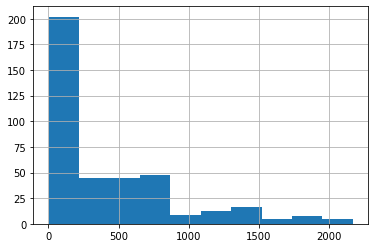

In [60]:
resul1["costo_estandar"].hist()

<span style="color:blue">VENDEDOR Y NUMERO DE VENTAS</span>

In [63]:
table8

,nombrevendedor,nombreproducto
0,Green Lake Bike Company,Mountain Bottle Cage
1,"Vision Cycles, Inc.",LL Crankarm
2,Bergeron Off-Roads,Lock Nut 2
3,Bergeron Off-Roads,Lock Nut 8
4,Leaf River Terrain,Thin-Jam Lock Nut 8
...,...,...
455,Aurora Bike Center,Internal Lock Washer 1
456,International Sport Assoc.,Spokes
457,First Rate Bicycles,LL Mountain Seat/Saddle
458,"Custom Frames, Inc.",Metal Sheet 3


In [64]:
conteo3= table8.groupby(["nombrevendedor"]).agg(["count"])["nombreproducto"]
conteo3

,count
nombrevendedor,
Advanced Bicycles,16
Allenson Cycles,1
American Bicycles and Wheels,1
American Bikes,1
Anderson's Custom Bikes,1
...,...
Vista Road Bikes,2
West Junction Cycles,1
WestAmerica Bicycle Co.,16
